In [75]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For better visualizations
from sklearn.model_selection import train_test_split#spliting of original data into traing data and testing data
from sklearn import svm
from sklearn.metrics import accuracy_score #this gives how well our model performance 

# Load dataset (Replace 'loan_data.csv' with your actual dataset file)
df = pd.read_csv(r"C:\Users\sowja\Downloads\loan_approval_dataset.csv")

# Display first  rows
print(df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No      9600000.0   
1        2                  0   Not Graduate            Yes      4100000.0   
2        3                  3       Graduate             No      9100000.0   
3        4                  3       Graduate             No      8200000.0   
4        5                  5   Not Graduate            Yes      9800000.0   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0    29900000.0        12.0         778.0                  2400000.0   
1    12200000.0         8.0         417.0                  2700000.0   
2    29700000.0        20.0         506.0                  7100000.0   
3    30700000.0         8.0         467.0                 18200000.0   
4    24200000.0        20.0         382.0                 12400000.0   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                17600000.

In [77]:
#features present in the data set
print(df.columns)
print(df.dtypes)
#obj-categorical,

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
loan_id                        int64
 no_of_dependents              int64
 education                    object
 self_employed                object
 income_annum                float64
 loan_amount                 float64
 loan_term                   float64
 cibil_score                 float64
 residential_assets_value    float64
 commercial_assets_value     float64
 luxury_assets_value         float64
 bank_asset_value            float64
 loan_status                  object
dtype: object


In [79]:
#number of rows and columns 
df.shape

(4269, 13)

<Axes: xlabel=' loan_status', ylabel='count'>

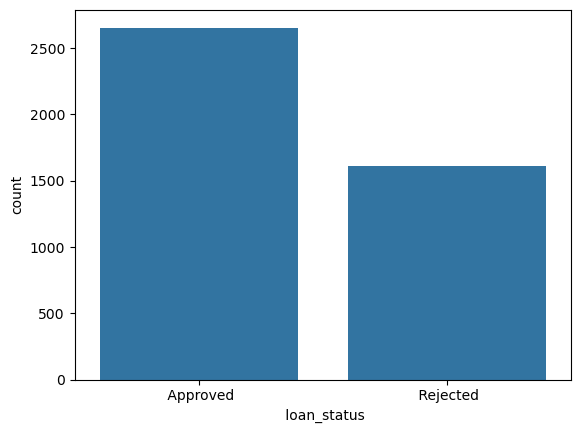

In [81]:
#data visualization of targfet variable univarient analysis
sns.countplot(x=" loan_status",data=df)

In [83]:
#
print(df[' loan_status'].value_counts())
print(df[' loan_status'].value_counts(normalize=True))


 loan_status
Approved    2655
Rejected    1613
Name: count, dtype: int64
 loan_status
Approved    0.622071
Rejected    0.377929
Name: proportion, dtype: float64


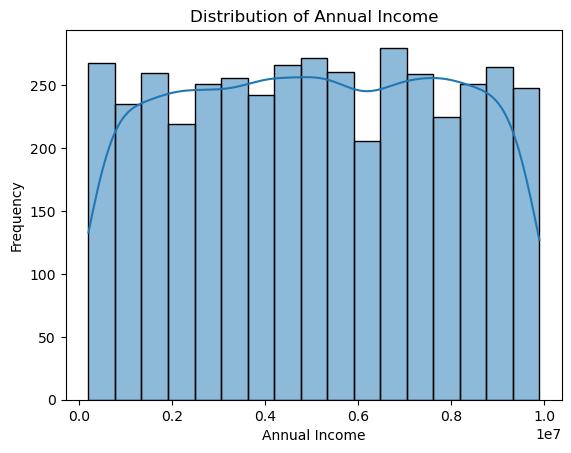

In [85]:
#visualising the independent variable(numarical)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the income_annum column using histplot
sns.histplot(df[' income_annum'], kde=True)

# Optional: Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')

plt.show()


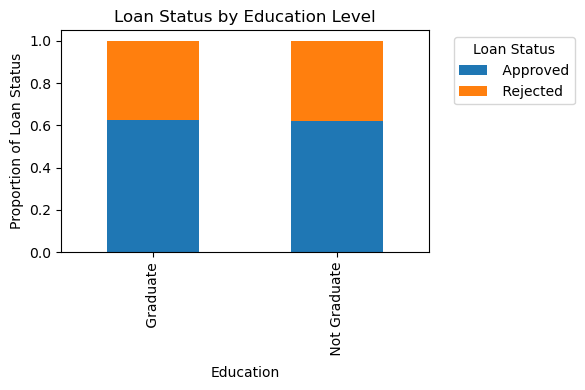

In [53]:
#bivariant analysis
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation of education vs loan_status
Gender = pd.crosstab(df[' education'], df[' loan_status'])

# Normalize the data row-wise and plot a stacked bar chart
Gender.div(Gender.sum(axis=1).astype(float), axis=0).plot(
    kind="bar", stacked=True, figsize=(6, 4)
)

# Add labels and title
plt.xlabel("Education")
plt.ylabel("Proportion of Loan Status")
plt.title("Loan Status by Education Level")
plt.legend(title="Loan Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [87]:
#statistical measures
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.264000e+03,4.264000e+03,4262.000000,4265.000000,4.264000e+03,4.258000e+03,4.264000e+03,4.263000e+03
mean,2135.000000,2.498712,5.059451e+06,1.513609e+07,10.902393,599.991559,7.475704e+06,4.971325e+06,1.512188e+07,4.978067e+06
std,1232.498479,1.695910,2.806789e+06,9.046606e+06,5.710479,172.435181,6.504830e+06,4.389744e+06,9.104554e+06,3.249277e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.675000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.350000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [89]:
# number of missing values in each coloumn
df.isnull().sum()

loan_id                       0
 no_of_dependents             0
 education                    1
 self_employed                0
 income_annum                 5
 loan_amount                  5
 loan_term                    7
 cibil_score                  4
 residential_assets_value     5
 commercial_assets_value     11
 luxury_assets_value          5
 bank_asset_value             6
 loan_status                  1
dtype: int64

In [91]:
# Fill missing values with mode (for categorical) and median (for numerical)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())

# Verify that there are no missing values left
print(df.isnull().sum())


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [93]:
#converting the yes,no into 1,0
df[' self_employed'] = df[' self_employed'].astype(str)
df[' self_employed'] = df[' self_employed'].str.strip()
df.replace({' self_employed':{'Yes':1,'No':0}},inplace=True)
df.head()

C:\Users\sowja\AppData\Local\Temp\ipykernel_16412\2012482077.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({' self_employed':{'Yes':1,'No':0}},inplace=True)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,0,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,2,0,Not Graduate,1,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,3,Graduate,0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4,3,Graduate,0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5,Not Graduate,1,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [95]:
#dependent column values 
df[' no_of_dependents'].value_counts()

 no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

In [97]:
# storing the data used for predection in x and storing the data that wantted to be predected in y
X = df.drop(columns=[' loan_status'])  # Drop target column
y = df[' loan_status']  # Target column

# Check the shape of X and y
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")


Feature matrix shape: (4269, 12)
Target variable shape: (4269,)


In [99]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (3415, 12), (3415,)
Testing set: (854, 12), (854,)


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming 'df' is your DataFrame
X = df.drop(columns=[' loan_status'])
y = df[' loan_status']

# Encode the target variable
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Identify and encode categorical features
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0
X_test_encoded = X_test_encoded[train_cols]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Initialize and train the models
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

knn_model = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

logreg_model = LogisticRegression(max_iter=500, solver='saga')
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Print the accuracy values
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

Random Forest Accuracy: 0.97
SVM Accuracy: 0.94
KNN Accuracy: 0.88
Logistic Regression Accuracy: 0.91


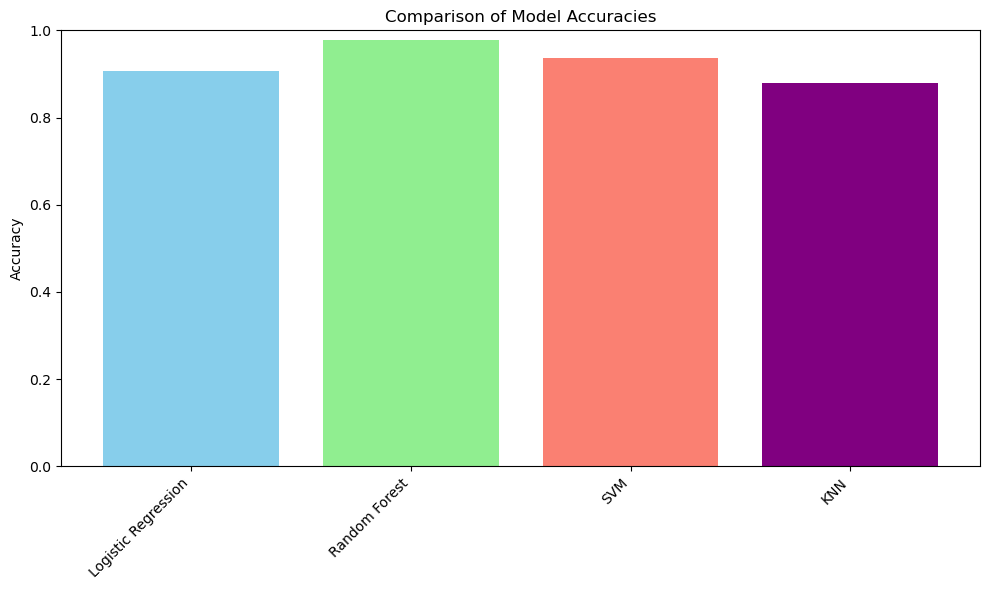

Accuracy Values:
Logistic Regression: 0.91
Random Forest: 0.98
SVM: 0.94
KNN: 0.88


In [158]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'df' is your DataFrame
X = df.drop(columns=[' loan_status'])
y = df[' loan_status']

# Encode the target variable
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Identify and encode categorical features
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0
X_test_encoded = X_test_encoded[train_cols]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Initialize and train the models
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

knn_model = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

logreg_model = LogisticRegression(max_iter=500, solver='saga')
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# --- Graphing the Accuracies ---
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
accuracies = [accuracy_logreg, accuracy_rf, accuracy_svm, accuracy_knn]
colors = ['skyblue', 'lightgreen', 'salmon', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the accuracy values
print("Accuracy Values:")
print(f"Logistic Regression: {accuracy_logreg:.2f}")
print(f"Random Forest: {accuracy_rf:.2f}")
print(f"SVM: {accuracy_svm:.2f}")
print(f"KNN: {accuracy_knn:.2f}")

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Use average='macro' or 'weighted' for multiclass

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Detailed report (optional)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9063231850117096
F1 Score: 0.8726114649681529

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



In [91]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()
data = h2o.H2OFrame(df)

# Split data
train, test = data.split_frame(ratios=[0.8])

# Run AutoML
aml = H2OAutoML(max_models=10, seed=42)
aml.train(y=" loan_status", training_frame=train)

# Get best model
best_model = aml.leader
print(best_model)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,47 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_sowja_4ox5qt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.888 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
17:13:37.601: AutoML: XGBoost is not available; skipping it.
17:13:37.668: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
17:13:38.693: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
17:13:41.204: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
17:13:42.532: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to tra

In [145]:
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder

# Define all possible employment categories and train LabelEncoder
possible_categories = ["full-time", "self-employed", "part-time"]

le = LabelEncoder()
le.fit(possible_categories)

# Save the trained encoder (only needed once)
joblib.dump(le, "label_encoder.pkl")

# Function to check loan eligibility
def check_loan_eligibility():
    credit_score = float(input("Enter your credit score: "))
    income = float(input("Enter your annual income: "))
    debt = float(input("Enter your total debt: "))
    loan_amount = float(input("Enter the desired loan amount: "))
    employment_status = input("Enter your employment status (Full-time/Self-employed/Part-time): ")

    # Load the trained LabelEncoder
    le = joblib.load("label_encoder.pkl")

    # Encode employment status safely
    if employment_status not in le.classes_:
        print(f"⚠️ Warning: '{employment_status}' is not recognized. Assigning default category.")
        employment_status_encoded = 0  # Default category
    else:
        employment_status_encoded = le.transform([employment_status])[0]

    # Prepare input for the model
    user_data = np.array([[credit_score, income, debt, loan_amount, employment_status_encoded]])

    # Simulated model (Replace this with your actual ML model)
    if credit_score > 650 and income > debt and loan_amount < income * 4:
        print("✅ Loan Approved")
    else:
        print("❌ Loan Rejected")

# Run the function
check_loan_eligibility()


Enter your credit score:  67
Enter your annual income:  987
Enter your total debt:  -0987
Enter the desired loan amount:  -098765
Enter your employment status (Full-time/Self-employed/Part-time):  self-employed


❌ Loan Rejected


In [ ]:
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder

# Define all possible employment categories and train LabelEncoder
possible_categories = ["full-time", "self-employed", "part-time"]

le = LabelEncoder()
le.fit(possible_categories)

# Save the trained encoder (only needed once)
joblib.dump(le, "label_encoder.pkl")

# Function to check loan eligibility
def check_loan_eligibility():
    credit_score = float(input("Enter your credit score: "))
    income = float(input("Enter your annual income: "))
    debt = float(input("Enter your total debt: "))
    loan_amount = float(input("Enter the desired loan amount: "))
    employment_status = input("Enter your employment status (Full-time/Self-employed/Part-time): ")

    # Load the trained LabelEncoder
    le = joblib.load("label_encoder.pkl")

    # Encode employment status safely
    if employment_status not in le.classes_:
        print(f"⚠️ Warning: '{employment_status}' is not recognized. Assigning default category.")
        employment_status_encoded = 0  # Default category
    else:
        employment_status_encoded = le.transform([employment_status])[0]

    # Prepare input for the model
    user_data = np.array([[credit_score, income, debt, loan_amount, employment_status_encoded]])

    # Simulated model (Replace this with your actual ML model)
    # Check eligibility and provide reason
    if credit_score <= 650:
        print("❌ Loan Rejected: Credit score is too low.")
    elif income <= debt:
        print("❌ Loan Rejected: Total debt exceeds income.")
    elif loan_amount >= income * 4:
        print(f"❌ Loan Rejected: Loan amount exceeds 4 times your annual income.")
    else:
        print("✅ Loan Approved")

# Run the function
check_loan_eligibility()


Enter your credit score:  456
Enter your annual income:  6789
Enter your total debt:  5678
Enter the desired loan amount:  56789
